In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [6]:
tol = 1e-6

In [ ]:
# Question 1 (Additional Method)

In [27]:
# The Egyptian Octagon Method 

import numpy as np

def egyptian_octagon(r):
    area = ((7/9) * r * r)*4
    return area

def error_analysis(r):
    og_area = np.pi * r ** 2
    eo_area = egyptian_octagon(r)

    error = (np.abs(og_area - eo_area) / og_area)*100

    return error

r = 50
print(egyptian_octagon(r))
print(error_analysis(r))

7777.777777777778
0.9702576317095609


In [7]:
#Question 2

Convergence occurs at step: 5


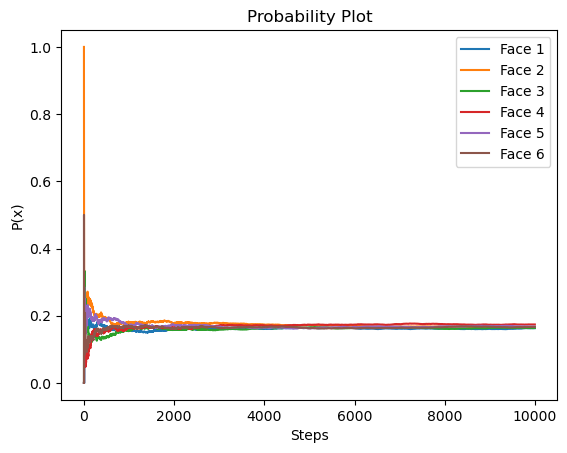

In [8]:
# Question 2a

def generate_rolls(steps):
    rolls = []
    for i in range(steps):
        result_on_rolling = rand.randrange(1, 7, 1)
        rolls.append(result_on_rolling)
    return rolls


def probability_for_every_face(steps):
    count = [0, 0, 0, 0, 0, 0]
    probability_arr = []
    rolls = generate_rolls(steps)

    for i in rolls:
        count[i - 1] += 1
        probability_arr.append([j / sum(count) for j in count])

    return np.array(probability_arr)  

def plot_probabilities(steps):
    probabilities = probability_for_every_face(steps)

    for i in range(6):
        plt.plot(probabilities[:, i], label=f'Face {i + 1}')

    plt.title('Probability Plot')
    plt.xlabel('Steps')
    plt.ylabel('P(x)')
    plt.legend()
    plt.show()

def see_convergence():
    min_difference = np.inf    
    convergence = 0

    for i in range(len(probabilities)):
        probability = probabilities[i, -1]
        difference = abs(1/6 - probability)

        if difference < min_difference:
            min_difference = difference
            convergence = i
    return convergence


steps = 10000
probabilities = probability_for_every_face(steps)

# print(probabilities)
convergence = see_convergence()

print(f"Convergence occurs at step: {convergence}")
plot_probabilities(steps)


In [9]:
def find_probability(roll_count):
    faces = [0] * 6
    probs = []

    for i in range(roll_count):
        print(i) #FOR DUBUGGING
        res = roll_a_dice()
        faces[res-1] += 1

        for count in faces:
            probability = count/(i+1)
            print(probability)
            probs.append(probability)
    return probs  

In [10]:
#Question 3

In [11]:
def fx(x):
    return 3*x + np.sin(x) - np.exp(x)

def dfx(x):
    return 3 + np.cos(x) - np.exp(x)                                 

In [12]:
#3. (a)

In [13]:
x_values = np.linspace(-4, 4, 1000)
y_values = fx(x_values)

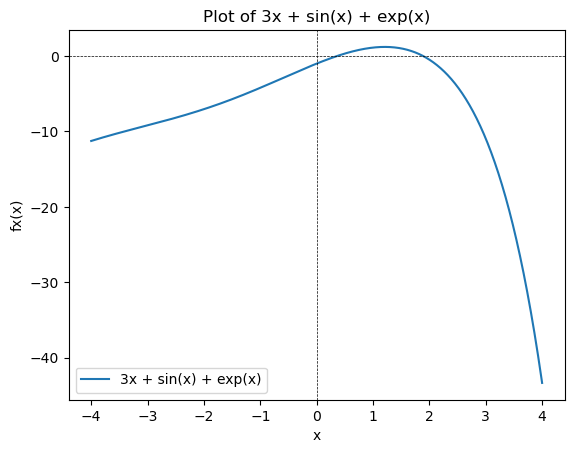

In [14]:
plt.plot(x_values, y_values, label = "3x + sin(x) + exp(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  #X-axis
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  #Y-axis
plt.xlabel('x')
plt.ylabel('fx(x)')
plt.title('Plot of 3x + sin(x) + exp(x)')
plt.legend()
plt.show()

In [15]:
#3. (b)

In [16]:
#Bisection Method

def bisection_method(f, a, b, tol, count):
    # check if the root is available between a and b or not
    if np.sign(f(a)) == np.sign(f(b)): #f(a)*f(b) > 0
        return None, None
        
    mid = (a+b)/2
    if np.abs(f(mid)) < tol:
        return mid, count
    elif np.sign(f(mid)) == np.sign(f(a)): #or we can do f(mid)*f(a) > 0
        #if sign of f(mid) and f(a) is same that means the root lies b/w mid and b
        #so we will call this function itself (recursion) with mid instead of a
        return bisection_method(f, mid, b, tol, count+1)
    elif np.sign(f(mid)) == np.sign(f(b)): #f(mid)*f(b) > 0
        #for this case we'll change the value of b instead of a with mid
        return bisection_method(f, a, mid, tol, count+1)

In [17]:
#Newton Raphson Method (Recursive)
def newton_raphson(f, df, x1, tol, count):
    #recursion elimination condition
    if count>500:
        return None, None   
    x2 = x1 - f(x1)/df(x1)
    if abs(f(x2)) < tol :
        return x2, count
    else:
        return newton_raphson(f, df, x2, tol, count + 1)

In [18]:
#3. (c) + (d)

In [19]:
#determine roots using Bisection Method

#from the avobe plotting we can guess the roots
#and also given x0 = 0 and x1 =1
#so lets take a =0 and b =1

a, b = 0, 1
root, count = bisection_method(fx, a, b, tol, 1)
print(f"First Root: {root}, and Iteration count = {count}")

#for another root we can take a = 1.5 and b = 2.5
a, b = 1.5, 2.5
root, count = bisection_method(fx, a, b, tol, 1)
print(f"Second Root: {root}, and Iteration count = {count}")

First Root: 0.36042165756225586, and Iteration count = 21
Second Root: 1.8900299072265625, and Iteration count = 16


In [20]:
#determine roots using Newton-Raphson Method

#given x0 =0

root, count = newton_raphson(fx, dfx, 0, tol, 1)

if root is not None:
    print(f"Root by using x0 =0 : {root}, and Iteration count = {count}")
else:
    print("Root not found")

Root by using x0 =0 : 0.36042168047601986, and Iteration count = 3


In [21]:
#Question 4

In [22]:
def f(x):
    return x**3-x
    
def df(x):
    return 3*x**2-1

def newton_raphson(f, df, x1, tol):
    if count>500:
        return None, None   
    x2 = x1 - f(x1)/df(x1)
    if abs(f(x2)) < tol :
        return x2
    else:
        return newton_raphson(f, df, x2, tol)



In [23]:
x_range = np.linspace(-1.5, 1.5, 100) #We are taking 100 points (values) b/w [-1.5,1.5]
tol = 1e-6

In [24]:
result = {} #We will store the result here ,as x : root

In [25]:
for x0 in x_range:
    root = newton_raphson(f, df, x0, tol)
    if root is not None:
        result[x0] = root

In [26]:
print(result)

{-1.5: -1.000000000015063, -1.4696969696969697: -1.000000000004414, -1.4393939393939394: -1.0000000000011502, -1.4090909090909092: -1.000000417709095, -1.378787878787879: -1.000000184061831, -1.3484848484848484: -1.0000000738580257, -1.3181818181818181: -1.000000026497931, -1.2878787878787878: -1.000000008298633, -1.2575757575757576: -1.0000000021971225, -1.2272727272727273: -1.0000000004704606, -1.196969696969697: -1.0000000000764575, -1.1666666666666665: -1.0000000000085694, -1.1363636363636362: -1.0000000000005678, -1.106060606060606: -1.0000001062904955, -1.0757575757575757: -1.0000000093529746, -1.0454545454545454: -1.0000000002054208, -1.0151515151515151: -1.0000001658037618, -0.9848484848484849: -1.0000001909904672, -0.9545454545454546: -1.0000000004799972, -0.9242424242424242: -1.0000000385089127, -0.8939393939393939: -1.0000000000008935, -0.8636363636363636: -1.0000000000932936, -0.8333333333333333: -1.000000004394073, -0.803030303030303: -1.000000122341511, -0.772727272727272